In [28]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [21]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [22]:
# Reshape data to fit the LeNet architecture (28x28x1)
X_train = X_train / 255.0

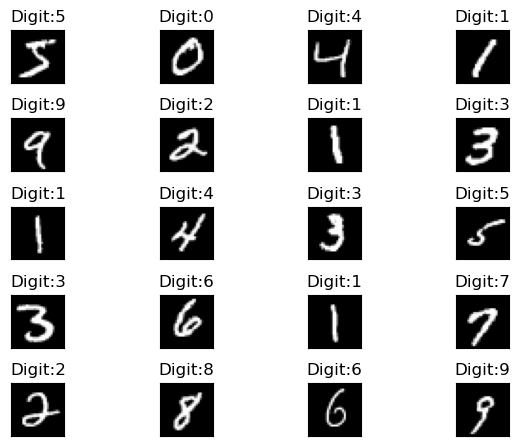

In [24]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
plot_digits(X_train, y_train)

In [29]:
X_dev, X_val, Y_dev, Y_val = train_test_split(X_train, y_train, test_size=0.03, shuffle=True, random_state=2019)
T_dev = pd.get_dummies(Y_dev).values
T_val = pd.get_dummies(Y_val).values

In [30]:
#Reshape the input 
X_dev = X_dev.reshape(X_dev.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

In [32]:
model = models.Sequential()
    
# first Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    
# Second Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    
model.add(layers.Flatten())
    
# Fully Connected Layers
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_6                  │ (None, 12, 12, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_7                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam', 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])

In [34]:
history = model.fit(
    x_train, y_train, 
    epochs=10, 
    batch_size=128, 
    validation_data=(x_test, y_test)
)


Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 10)

In [35]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape data to fit the LeNet architecture (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert labels to categorical one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [36]:
def build_lenet():
    model = models.Sequential()
    
    # First Convolutional Layer
    model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # Second Convolutional Layer
    model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # Flatten the output
    model.add(layers.Flatten())
    
    # Fully Connected Layers
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

# Create the model
lenet_model = build_lenet()


In [37]:
lenet_model.compile(optimizer='adam', 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])


In [ ]:
history = lenet_model.fit(x_train, y_train, 
                          epochs=10, 
                          batch_size=128, 
                          validation_data=(x_test, y_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.7943 - loss: 0.7361 - val_accuracy: 0.9660 - val_loss: 0.1119
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9631 - loss: 0.1199 - val_accuracy: 0.9756 - val_loss: 0.0735
Epoch 3/10
308/469 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9753 - loss: 0.0805

In [ ]:
test_loss, test_acc = lenet_model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')